In [67]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
df=pd.read_excel("276A_Temp.xlsx")

In [27]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,2020-01-15 01:44:00,71.5,59.25,68,2020-01-14 01:44:00,71.0,2020-01-13 01:44:00,72.7
1,2020-01-15 03:44:00,71.8,59.25,66,2020-01-14 03:44:00,71.4,2020-01-13 03:44:00,72.8
2,2020-01-15 05:44:00,72.1,59.45,68,2020-01-14 05:44:00,71.6,2020-01-13 05:44:00,72.9
3,2020-01-15 07:44:00,70.7,61.04,72,2020-01-14 07:44:00,70.3,2020-01-13 07:44:00,71.8
4,2020-01-15 09:44:00,70.9,60.22,75,2020-01-14 09:44:00,70.4,2020-01-13 09:44:00,71.2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null datetime64[ns]
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null datetime64[ns]
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null datetime64[ns]
Temperature 2 days before      384 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(1)
memory usage: 24.1 KB


In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [30]:
df.head()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-15 01:44:00,71.5,59.25,68,2020-01-14 01:44:00,71.0,2020-01-13 01:44:00,72.7
2020-01-15 03:44:00,71.8,59.25,66,2020-01-14 03:44:00,71.4,2020-01-13 03:44:00,72.8
2020-01-15 05:44:00,72.1,59.45,68,2020-01-14 05:44:00,71.6,2020-01-13 05:44:00,72.9
2020-01-15 07:44:00,70.7,61.04,72,2020-01-14 07:44:00,70.3,2020-01-13 07:44:00,71.8
2020-01-15 09:44:00,70.9,60.22,75,2020-01-14 09:44:00,70.4,2020-01-13 09:44:00,71.2


In [31]:
df.dropna(inplace=True)

In [32]:
df[df['Temperature on Previous day']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-17 17:44:00,70.0,58.52,68,2020-01-16 17:44:00,0.1,2020-01-15 17:44:00,71.2
2020-01-20 07:44:00,70.9,36.18,47,2020-01-19 07:44:00,0.1,2020-01-18 07:44:00,72.6
2020-01-22 21:44:00,70.3,39.07,48,2020-01-21 21:44:00,0.1,2020-01-20 21:44:00,69.5


In [33]:
df.loc['2020-01-20 07:44:00','Temperature on Previous day']=(df.loc['2020-01-20 05:44:00','Temperature on Previous day']+df.loc['2020-01-20 09:44:00','Temperature on Previous day'])/2

In [34]:
df.loc['2020-01-17 17:44:00','Temperature on Previous day']=(df.loc['2020-01-17 15:44:00','Temperature on Previous day']+df.loc['2020-01-17 19:44:00','Temperature on Previous day'])/2

In [35]:
df.loc['2020-01-22 21:44:00','Temperature on Previous day']=(df.loc['2020-01-22 19:44:00','Temperature on Previous day']+df.loc['2020-01-22 23:44:00','Temperature on Previous day'])/2

In [36]:
df[df['Temperature 2 days before']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-18 17:44:00,71.5,62.24,66,2020-01-17 17:44:00,70.0,2020-01-16 17:44:00,0.1
2020-01-21 07:44:00,69.5,33.95,42,2020-01-20 07:44:00,70.9,2020-01-19 07:44:00,0.1
2020-01-23 21:44:00,70.5,51.20,54,2020-01-22 21:44:00,70.3,2020-01-21 21:44:00,0.1


In [37]:
df.loc['2020-01-21 07:44:00','Temperature 2 days before']=(df.loc['2020-01-21 05:44:00','Temperature 2 days before']+df.loc['2020-01-21 09:44:00','Temperature 2 days before'])/2

In [38]:
df.loc['2020-01-18 17:44:00','Temperature 2 days before']=(df.loc['2020-01-18 15:44:00','Temperature 2 days before']+df.loc['2020-01-18 19:44:00','Temperature 2 days before'])/2

In [39]:
df.loc['2020-01-23 21:44:00','Temperature 2 days before']=(df.loc['2020-01-23 19:44:00','Temperature 2 days before']+df.loc['2020-01-23 23:44:00','Temperature 2 days before'])/2

In [40]:
df[df['Temperature 2 days before']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2020-01-15 01:44:00 to 2020-02-15 23:44:00
Data columns (total 7 columns):
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null datetime64[ns]
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null datetime64[ns]
Temperature 2 days before      384 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 34.0 KB


In [42]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['2/03/2020':'2/07/2020'],df.loc['2/10/2020':'2/14/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts=pd.DataFrame(ts)
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:44:00,71.5,59.25,68,71.0,72.7
2020-01-15 03:44:00,71.8,59.25,66,71.4,72.8
2020-01-15 05:44:00,72.1,59.45,68,71.6,72.9
2020-01-15 07:44:00,70.7,61.04,72,70.3,71.8
2020-01-15 09:44:00,70.9,60.22,75,70.4,71.2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


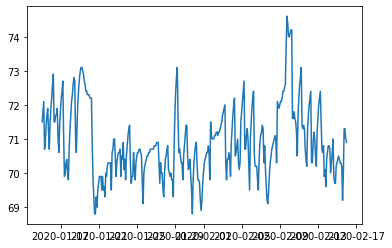

In [43]:
plt.plot(ts['Temperature'])

In [44]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2020-01-15 01:44:00 to 2020-02-15 23:44:00
Data columns (total 5 columns):
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Temperature on Previous day    384 non-null float64
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1)
memory usage: 18.0 KB


In [45]:
values=ts.values

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [47]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [48]:
reframed = series_to_supervised(scaled, 12, 1)

In [49]:
reframed.head()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
12,0.465517,0.870766,0.804348,0.379310,0.672414,0.517241,0.870766,0.760870,0.448276,0.689655,...,0.534483,0.824729,0.717391,0.396552,0.327586,0.586207,0.820783,0.717391,0.465517,0.379310
13,0.517241,0.870766,0.760870,0.448276,0.689655,0.568966,0.877343,0.804348,0.482759,0.706897,...,0.586207,0.820783,0.717391,0.465517,0.379310,0.655172,0.818481,0.760870,0.517241,0.448276
14,0.568966,0.877343,0.804348,0.482759,0.706897,0.327586,0.929628,0.891304,0.258621,0.517241,...,0.655172,0.818481,0.760870,0.517241,0.448276,0.706897,0.824400,0.760870,0.568966,0.482759
15,0.327586,0.929628,0.891304,0.258621,0.517241,0.362069,0.902664,0.956522,0.275862,0.413793,...,0.706897,0.824400,0.760870,0.568966,0.482759,0.465517,0.898718,0.847826,0.327586,0.258621
16,0.362069,0.902664,0.956522,0.275862,0.413793,0.448276,0.898718,0.956522,0.310345,0.293103,...,0.465517,0.898718,0.847826,0.327586,0.258621,0.465517,0.881618,0.913043,0.362069,0.275862


In [50]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[61,62,63,64]], axis=1, inplace=True)

In [51]:
reframed.tail()

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var1(t-11),var2(t-11),var3(t-11),var4(t-11),var5(t-11),...,var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
379,0.189655,0.389674,0.456522,0.189655,0.379310,0.155172,0.384742,0.347826,0.224138,0.293103,...,0.163762,0.717391,0.310345,0.310345,0.068966,0.244656,0.760870,0.379310,0.344828,0.206897
380,0.155172,0.384742,0.347826,0.224138,0.293103,0.155172,0.387044,0.239130,0.137931,0.241379,...,0.244656,0.760870,0.379310,0.344828,0.206897,0.274252,0.673913,0.189655,0.189655,0.431034
381,0.155172,0.387044,0.239130,0.137931,0.241379,0.241379,0.333443,0.173913,0.275862,0.413793,...,0.274252,0.673913,0.189655,0.189655,0.431034,0.283131,0.673913,0.155172,0.224138,0.431034
382,0.241379,0.333443,0.173913,0.275862,0.413793,0.258621,0.292996,0.195652,0.310345,0.482759,...,0.283131,0.673913,0.155172,0.224138,0.431034,0.306478,0.695652,0.155172,0.137931,0.379310
383,0.258621,0.292996,0.195652,0.310345,0.482759,0.275862,0.250575,0.260870,0.344828,0.551724,...,0.306478,0.695652,0.155172,0.137931,0.379310,0.339691,0.652174,0.241379,0.275862,0.362069


In [52]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 12 to 383
Data columns (total 61 columns):
var1(t-12)    372 non-null float64
var2(t-12)    372 non-null float64
var3(t-12)    372 non-null float64
var4(t-12)    372 non-null float64
var5(t-12)    372 non-null float64
var1(t-11)    372 non-null float64
var2(t-11)    372 non-null float64
var3(t-11)    372 non-null float64
var4(t-11)    372 non-null float64
var5(t-11)    372 non-null float64
var1(t-10)    372 non-null float64
var2(t-10)    372 non-null float64
var3(t-10)    372 non-null float64
var4(t-10)    372 non-null float64
var5(t-10)    372 non-null float64
var1(t-9)     372 non-null float64
var2(t-9)     372 non-null float64
var3(t-9)     372 non-null float64
var4(t-9)     372 non-null float64
var5(t-9)     372 non-null float64
var1(t-8)     372 non-null float64
var2(t-8)     372 non-null float64
var3(t-8)     372 non-null float64
var4(t-8)     372 non-null float64
var5(t-8)     372 non-null float64
var1(t-7)     372 n

In [53]:
# split into train and test sets
values = reframed.values
n_train = 276
train = values[:n_train, :]
test = values[n_train:, :]

In [54]:
test.shape

(96, 61)

In [55]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 60) (96, 60) (276,) (96,)


In [56]:
# specify the number of lag hours
n_hours = 12
n_features = 5

In [57]:
# split into input and outputs
#n_obs = n_hours * n_features
#train_X, train_y = train[:, :n_obs], train[:, -n_features]
#test_X, test_y = test[:, :n_obs], test[:, -n_features]
#print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

In [58]:
test_y

array([0.29310345, 0.32758621, 0.34482759, 0.36206897, 0.37931034,
       0.39655172, 0.37931034, 0.25862069, 0.56896552, 0.55172414,
       0.53448276, 0.55172414, 0.56896552, 0.56896552, 0.5862069 ,
       0.62068966, 0.62068966, 0.63793103, 0.65517241, 0.84482759,
       1.        , 0.96551724, 0.89655172, 0.89655172, 0.9137931 ,
       0.93103448, 0.93103448, 0.48275862, 0.48275862, 0.51724138,
       0.48275862, 0.46551724, 0.4137931 , 0.29310345, 0.5       ,
       0.5862069 , 0.65517241, 0.68965517, 0.74137931, 0.44827586,
       0.43103448, 0.44827586, 0.43103448, 0.32758621, 0.27586207,
       0.24137931, 0.43103448, 0.5       , 0.55172414, 0.5862069 ,
       0.62068966, 0.25862069, 0.25862069, 0.36206897, 0.4137931 ,
       0.37931034, 0.29310345, 0.24137931, 0.4137931 , 0.48275862,
       0.55172414, 0.5862069 , 0.62068966, 0.46551724, 0.32758621,
       0.31034483, 0.34482759, 0.18965517, 0.22413793, 0.13793103,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.32758

In [59]:
test_X

array([[0.4137931 , 0.26767511, 0.06521739, ..., 0.5       , 0.39655172,
        0.46551724],
       [0.44827586, 0.21637619, 0.08695652, ..., 0.5       , 0.4137931 ,
        0.53448276],
       [0.43103448, 0.18382111, 0.30434783, ..., 0.52173913, 0.44827586,
        0.5862069 ],
       ...,
       [0.15517241, 0.38704374, 0.23913043, ..., 0.67391304, 0.15517241,
        0.22413793],
       [0.24137931, 0.33344295, 0.17391304, ..., 0.69565217, 0.15517241,
        0.13793103],
       [0.25862069, 0.29299573, 0.19565217, ..., 0.65217391, 0.24137931,
        0.27586207]])

In [60]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [61]:
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(276, 12, 5) (96, 12, 5) (276,) (96,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 96 samples
Epoch 1/30
 - 1s - loss: 0.1658 - val_loss: 0.1747
Epoch 2/30
 - 0s - loss: 0.1195 - val_loss: 0.1447
Epoch 3/30
 - 0s - loss: 0.1221 - val_loss: 0.1398
Epoch 4/30
 - 0s - loss: 0.1155 - val_loss: 0.1369
Epoch 5/30
 - 0s - loss: 0.1102 - val_loss: 0.1304
Epoch 6/30
 - 0s - loss: 0.1069 - val_loss: 0.1251
Epoch 7/30
 - 0s - loss: 0.1018 - val_loss: 0.1187
Epoch 8/30
 - 0s - loss: 0.0979 - val_loss: 0.1123
Epoch 9/30
 - 0s - loss: 0.0921 - val_loss: 0.1149
Epoch 10/30
 - 0s - loss: 0.0924 - val_loss: 0.1076
Epoch 11/30
 - 0s - loss: 0.0880 - val_loss: 0.1140
Epoch 12/30
 - 0s - loss: 0.0896 - val_loss: 0.1096
Epoch 13/30
 - 0s - loss: 0.0872 - val_loss: 0.1051
Epoch 14/30
 - 0s - loss: 0.0838 - val_loss: 0.1055
Epoch 15/30
 - 0s - loss: 0.0830 - val_loss: 0.1053
Epoch 16/30
 - 0s - loss: 0.0832 - val_loss: 0.1006
Epoch 17/30


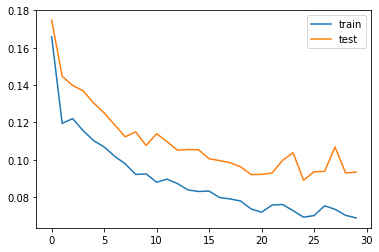

In [62]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [63]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))

In [64]:
test_X.shape

(96, 60)

In [65]:
# invert scaling for forecast
#inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
#inv_yhat.shape
#inv_yhat = scaler.inverse_transform(yhat)
#inv_yhat = inv_yhat[:,0]

In [68]:
# invert scaling for forecast
testy_forecast = np.zeros(shape=(len(test_y), 5))

testy_forecast[:,0] = yhat[:,0]

inv_yhat = scaler.inverse_transform(testy_forecast)[:,0]

In [69]:
# invert scaling for actual test
testy_actual = np.zeros(shape=(len(test_y), 5))

testy_actual[:,0] = test_y

inv_y = scaler.inverse_transform(testy_actual)[:,0]

In [70]:
# invert scaling for actual train
trainy_actual = np.zeros(shape=(len(train_y), 5))

trainy_actual[:,0] = train_y

inv_y_train = scaler.inverse_transform(trainy_actual)[:,0]

In [71]:
inv_yhat

array([70.59209102, 70.75243923, 70.7712367 , 70.61158249, 70.35700235,
       70.36638449, 70.35800472, 70.36605572, 70.31983505, 70.92289712,
       71.45117103, 71.78097286, 71.95248672, 71.97803861, 71.86573986,
       71.67602678, 71.57867692, 71.54366095, 71.57548569, 71.68556916,
       72.11795208, 73.02951353, 73.46632185, 73.50714223, 73.41021949,
       73.23836062, 73.02512305, 72.82789378, 71.92917259, 71.43261988,
       71.28775778, 71.25238367, 71.46579254, 71.66802868, 71.37846074,
       71.46027868, 71.55324084, 71.64550483, 71.66639487, 71.66859218,
       70.77907301, 70.55336579, 70.70087877, 70.91479272, 71.06163796,
       71.07144999, 70.99736344, 71.46951424, 71.80609884, 72.01175714,
       72.05270716, 72.00481257, 70.98925436, 70.66437419, 70.79377921,
       71.06641667, 71.20813059, 71.24925295, 71.29506862, 71.87367936,
       72.25230072, 72.42363135, 72.33342258, 72.07103412, 71.27353609,
       70.76231297, 70.59943487, 70.62908961, 70.42230051, 70.43

In [72]:
inv_y

array([70.5, 70.7, 70.8, 70.9, 71. , 71.1, 71. , 70.3, 72.1, 72. , 71.9,
       72. , 72.1, 72.1, 72.2, 72.4, 72.4, 72.5, 72.6, 73.7, 74.6, 74.4,
       74. , 74. , 74.1, 74.2, 74.2, 71.6, 71.6, 71.8, 71.6, 71.5, 71.2,
       70.5, 71.7, 72.2, 72.6, 72.8, 73.1, 71.4, 71.3, 71.4, 71.3, 70.7,
       70.4, 70.2, 71.3, 71.7, 72. , 72.2, 72.4, 70.3, 70.3, 70.9, 71.2,
       71. , 70.5, 70.2, 71.2, 71.6, 72. , 72.2, 72.4, 71.5, 70.7, 70.6,
       70.8, 69.9, 70.1, 69.6, 70.4, 70.6, 70.8, 70.8, 70.7, 70. , 70.3,
       70.6, 71. , 69.9, 69.7, 69.7, 70.2, 70.3, 70.4, 70.5, 70.4, 70.3,
       70.3, 70.2, 69.2, 70. , 71.3, 71.3, 71. , 70.9])

In [73]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.728


In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Temperature (F)')

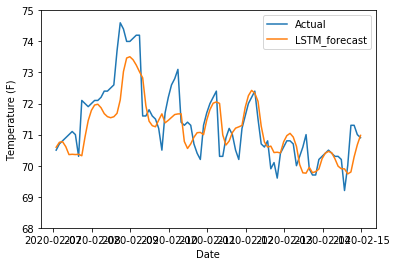

In [75]:
plt.plot(ts.index[276:372],inv_y,label='Actual')
plt.plot(ts.index[276:372],inv_yhat,label='LSTM_forecast')
plt.legend(loc="upper right")
plt.ylim(68,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

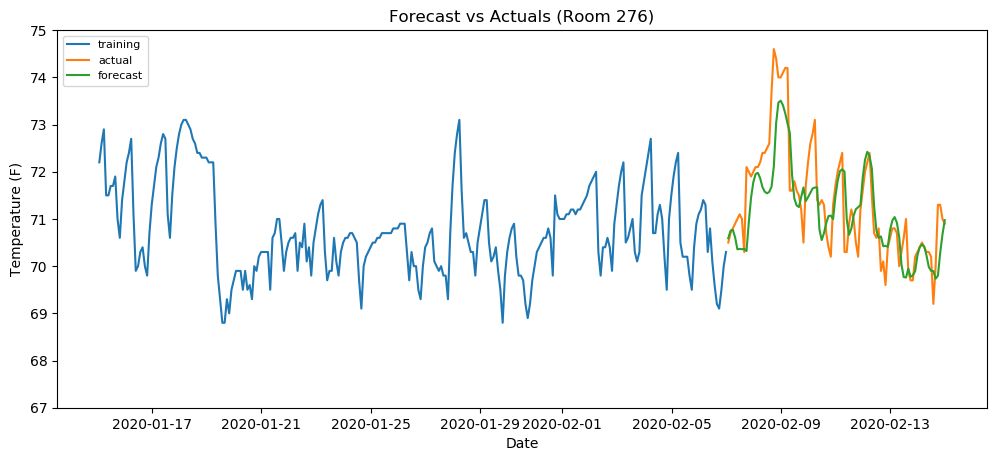

In [76]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y, label='actual')
plt.plot(ts.index[276:372],inv_yhat, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 276)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(67,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

# Linear regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
regressor = LinearRegression()

In [79]:
train_X_lr, train_y_lr = train[:, :-1], train[:, -1]
test_X_lr, test_y_lr = test[:, :-1], test[:, -1]

In [80]:
regressor.fit(train_X_lr,train_y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_pred= regressor.predict(test_X_lr)

In [82]:
#Invert scaling for forecast
testy_forecast_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_forecast_lr[:,0] = y_pred

inv_yhat_lr = scaler.inverse_transform(testy_forecast_lr)[:,0]

In [83]:
inv_yhat_lr.shape

(96,)

In [84]:
#Invert scaling for actual
# invert scaling for actual

testy_actual_lr = np.zeros(shape=(len(test_y_lr), 5))

testy_actual_lr[:,0] = test_y_lr

inv_y_lr = scaler.inverse_transform(testy_actual_lr)[:,0]

In [85]:
inv_y_lr

array([70.5, 70.7, 70.8, 70.9, 71. , 71.1, 71. , 70.3, 72.1, 72. , 71.9,
       72. , 72.1, 72.1, 72.2, 72.4, 72.4, 72.5, 72.6, 73.7, 74.6, 74.4,
       74. , 74. , 74.1, 74.2, 74.2, 71.6, 71.6, 71.8, 71.6, 71.5, 71.2,
       70.5, 71.7, 72.2, 72.6, 72.8, 73.1, 71.4, 71.3, 71.4, 71.3, 70.7,
       70.4, 70.2, 71.3, 71.7, 72. , 72.2, 72.4, 70.3, 70.3, 70.9, 71.2,
       71. , 70.5, 70.2, 71.2, 71.6, 72. , 72.2, 72.4, 71.5, 70.7, 70.6,
       70.8, 69.9, 70.1, 69.6, 70.4, 70.6, 70.8, 70.8, 70.7, 70. , 70.3,
       70.6, 71. , 69.9, 69.7, 69.7, 70.2, 70.3, 70.4, 70.5, 70.4, 70.3,
       70.3, 70.2, 69.2, 70. , 71.3, 71.3, 71. , 70.9])

Text(0, 0.5, 'Temperature (F)')

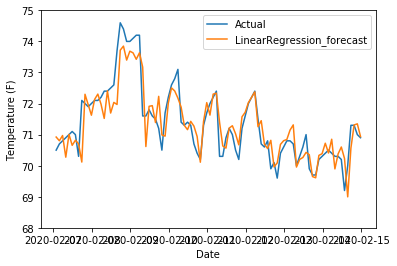

In [86]:
plt.plot(ts.index[276:372],inv_y_lr,label='Actual')
plt.plot(ts.index[276:372],inv_yhat_lr,label='LinearRegression_forecast')
plt.legend(loc="upper right")
plt.ylim(68,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

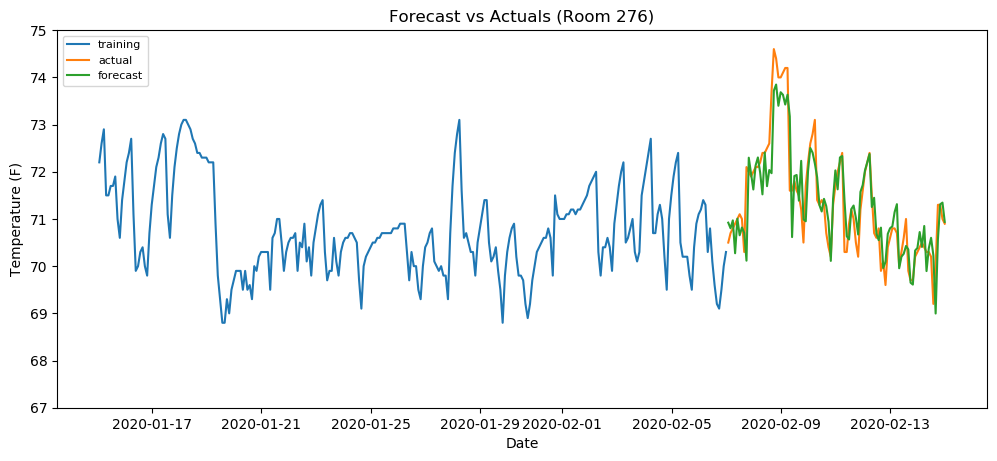

In [87]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts.index[:276],inv_y_train, label='training')
plt.plot(ts.index[276:372],inv_y_lr, label='actual')
plt.plot(ts.index[276:372],inv_yhat_lr, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 276)')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(67,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

In [88]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_lr, inv_yhat_lr))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.550
